In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
# Step 1: Load the Data
flexfield_data = pd.read_csv(r"C:/Users/lily xie/Desktop/202XExtraCurriculars/202410 BOLT Datathon/flexfield_fitness.csv")
coreboost_data = pd.read_csv(r"C:\Users\lily xie\Desktop\202XExtraCurriculars\202410 BOLT Datathon\coreboost.csv")

In [18]:
flexfield_data['Hours at Gym (per week)'].fillna(0, inplace=True)

In [19]:
# Step 2: Data Cleaning
flexfield_data.dropna(inplace=True)  # Remove missing values
coreboost_data.dropna(inplace=True)

In [23]:
flexfield_data.head()

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Gym Membership Length (years),Calorie Intake
1,771155,Female,24,6.2,Endurance training,4,2173.0
2,231932,Male,22,7.4,Fat loss,2,1752.0
3,465838,Female,23,6.0,Build muscle,0,2884.0
4,359178,Female,18,9.3,Build muscle,5,2559.0
5,744167,Male,23,5.7,Flexibility,1,1606.0


In [24]:
coreboost_data.head()

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Preferred Sports Drink Type,Average Weekly Consumption (Bottles)
0,221958,Female,27,7.3,Build muscle,Electrolyte,10
1,771155,Female,24,6.2,Endurance training,Electrolyte,11
2,231932,Male,22,7.4,Fat loss,Electrolyte,12
3,465838,Female,23,6.0,Build muscle,Protein shakes,10
4,359178,Female,18,9.3,Build muscle,Protein shakes,14


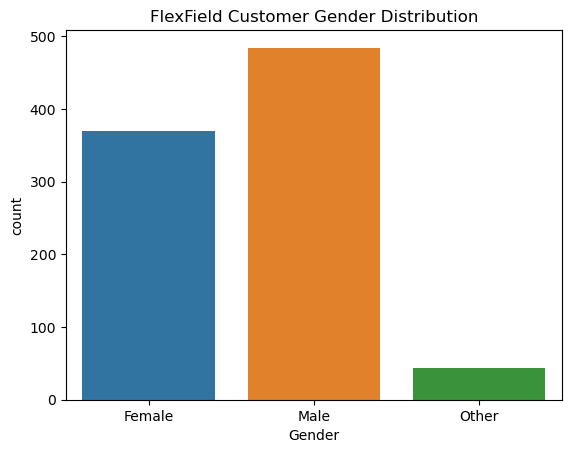

In [35]:
# Step 3: Individual Company Analysis
# FlexField Analysis: Gender Distribution
sns.countplot(x='Gender', data=flexfield_data)
plt.title('FlexField Customer Gender Distribution')
plt.show()

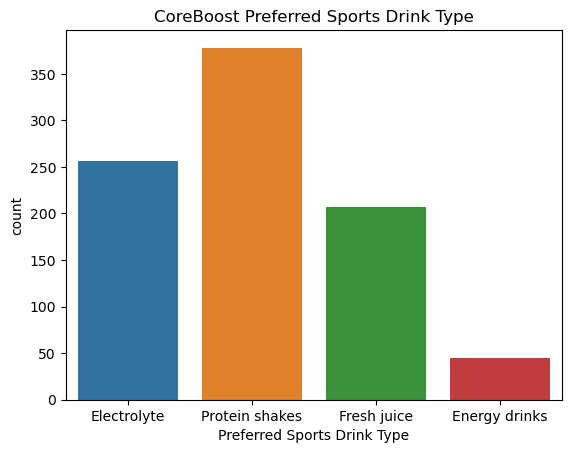

In [36]:
# CoreBoost Analysis: Preferred Sports Drink Type
sns.countplot(x='Preferred Sports Drink Type', data=coreboost_data)
plt.title('CoreBoost Preferred Sports Drink Type')
plt.show()

In [37]:
# Step 4: Merge DataFrames for Comparative Analysis
merged_data = pd.merge(flexfield_data, coreboost_data, on='Customer ID', how='inner')

In [38]:
print(merged_data.columns)

Index(['Customer ID', 'Gender_x', 'Age_x', 'Hours at Gym (per week)_x',
       'Fitness Goal_x', 'Gym Membership Length (years)', 'Calorie Intake',
       'Gender_y', 'Age_y', 'Hours at Gym (per week)_y', 'Fitness Goal_y',
       'Preferred Sports Drink Type', 'Average Weekly Consumption (Bottles)'],
      dtype='object')


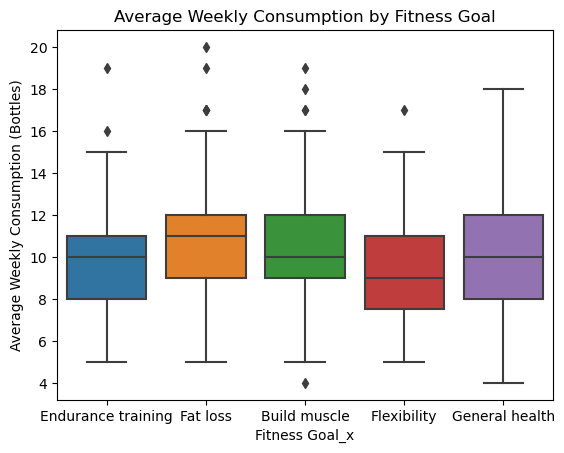

In [39]:
sns.boxplot(x='Fitness Goal_x', y='Average Weekly Consumption (Bottles)', data=merged_data)
plt.title('Average Weekly Consumption by Fitness Goal')
plt.show()


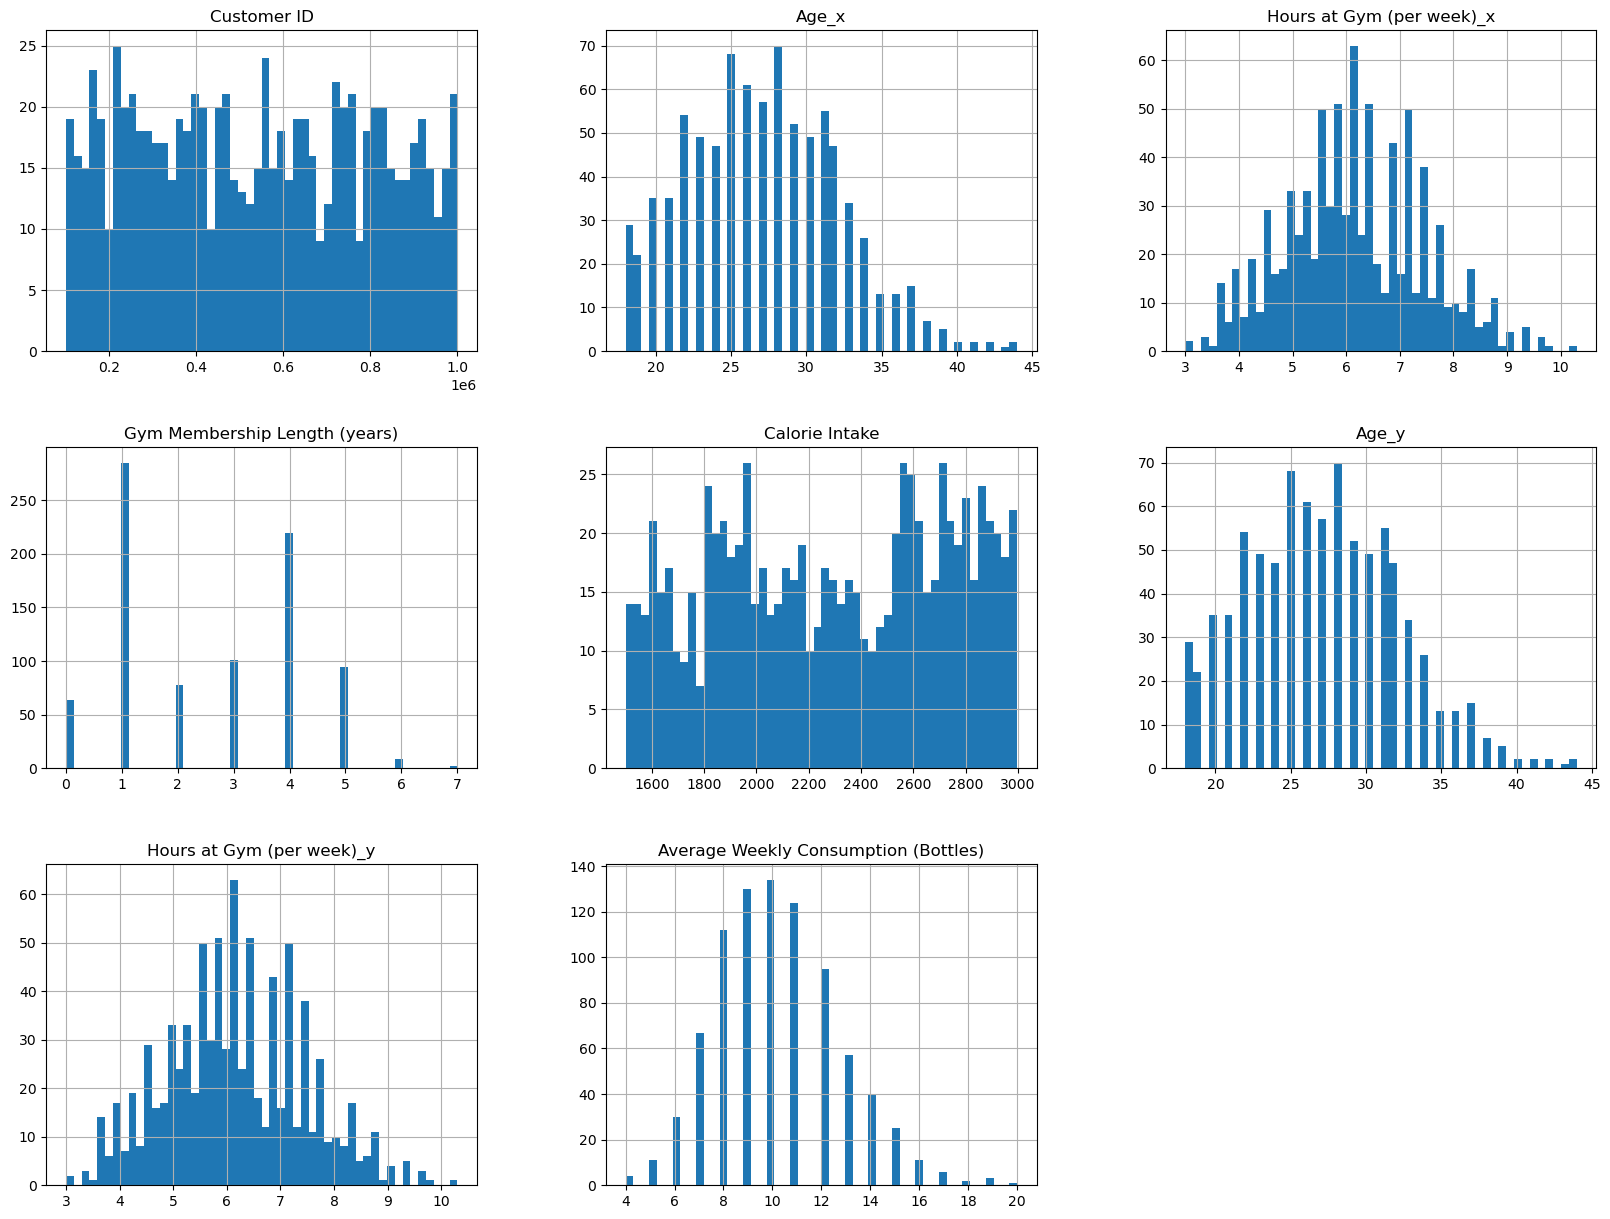

In [40]:
merged_data.hist(bins=50,figsize=(20,15))
plt.show()

ValueError: Could not interpret input 'Fitness Goal'

In [31]:
# Scatter plot: Hours at Gym vs Average Weekly Consumption (Bottles)
sns.scatterplot(data=merged_data, x='Hours at Gym (per week)', y='Average Weekly Consumption (Bottles)')
plt.title('Hours at Gym vs Average Weekly Consumption (Bottles)')
plt.xlabel('Hours at Gym (per week)')
plt.ylabel('Average Weekly Consumption (Bottles)')
plt.show()

ValueError: Could not interpret value `Hours at Gym (per week)` for parameter `x`